In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
training= pd.read_csv('training.csv' ,sep=';' , thousands="." )

In [3]:
df=pd.DataFrame(training)
df

,Stagione,Calciatore,Squadra,Età,Partite Giocate,Minuti Giocati,Reti,Assist,Reti Non Su Rigore,Rigori Tirati,Ammonizioni,Espulsioni,Ruolo?
0,2024-25,James Abankwah,Udinese,20.0,6.0,88,0.0,0.0,0.0,0.0,1.0,0,"Dif,Cen"
1,2024-25,Saud Abdulhamid,Roma,25.0,4.0,205,0.0,1.0,0.0,0.0,0.0,0,Dif
2,2024-25,Oliver Abildgaard,Como,28.0,1.0,7,0.0,0.0,0.0,0.0,0.0,0,Cen
3,2024-25,Tammy Abraham,Roma,26.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0,Att
4,2024-25,Tammy Abraham,Milan,26.0,28.0,1.183,3.0,4.0,2.0,2.0,1.0,0,Att
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,2020-21,Marvin Zeegelaar,Udinese,29.0,24.0,1.740,1.0,0.0,1.0,0.0,6.0,0,Dif
2484,2020-21,Piotr Zieliński,Napoli,26.0,36.0,2.523,8.0,10.0,8.0,0.0,2.0,0,Cen
2485,2020-21,Joshua Zirkzee,Parma,19.0,4.0,113,0.0,0.0,0.0,0.0,0.0,0,"Att,Cen"
2486,2020-21,Jeroen Zoet,Spezia,29.0,7.0,603,0.0,0.0,0.0,0.0,1.0,0,Por


In [4]:
df.dtypes

Stagione               object
Calciatore             object
Squadra                object
Età                   float64
Partite Giocate       float64
Minuti Giocati         object
Reti                  float64
Assist                float64
Reti Non Su Rigore    float64
Rigori Tirati         float64
Ammonizioni           float64
Espulsioni             object
Ruolo?                 object
dtype: object

In [5]:
print(training.isna().sum())

Stagione              0
Calciatore            0
Squadra               1
Età                   2
Partite Giocate       2
Minuti Giocati        1
Reti                  1
Assist                1
Reti Non Su Rigore    1
Rigori Tirati         1
Ammonizioni           1
Espulsioni            1
Ruolo?                1
dtype: int64


In [6]:
df=df.replace([np.inf, -np.inf], np.nan)
df[df.isna().any(axis=1)]

,Stagione,Calciatore,Squadra,Età,Partite Giocate,Minuti Giocati,Reti,Assist,Reti Non Su Rigore,Rigori Tirati,Ammonizioni,Espulsioni,Ruolo?
1990,2020-21,Giovanni Crociata,Crotone,NaN,2.0,26,0.0,0.0,0.0,0.0,0.0,0,Dif
2037,2020-21,Federico Dimarco,NaN,22.0,35.0,2.613,5.0,3.0,5.0,0.0,6.0,0,Dif
2130,2020-21,Hamed Junior Traorè,Sassuolo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2175,2020-21,Fernando Llorente,Napoli,35.0,NaN,52,0.0,0.0,0.0,0.0,0.0,0,"Att,Cen"


In [7]:
df.drop(2130)

,Stagione,Calciatore,Squadra,Età,Partite Giocate,Minuti Giocati,Reti,Assist,Reti Non Su Rigore,Rigori Tirati,Ammonizioni,Espulsioni,Ruolo?
0,2024-25,James Abankwah,Udinese,20.0,6.0,88,0.0,0.0,0.0,0.0,1.0,0,"Dif,Cen"
1,2024-25,Saud Abdulhamid,Roma,25.0,4.0,205,0.0,1.0,0.0,0.0,0.0,0,Dif
2,2024-25,Oliver Abildgaard,Como,28.0,1.0,7,0.0,0.0,0.0,0.0,0.0,0,Cen
3,2024-25,Tammy Abraham,Roma,26.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0,Att
4,2024-25,Tammy Abraham,Milan,26.0,28.0,1.183,3.0,4.0,2.0,2.0,1.0,0,Att
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,2020-21,Marvin Zeegelaar,Udinese,29.0,24.0,1.740,1.0,0.0,1.0,0.0,6.0,0,Dif
2484,2020-21,Piotr Zieliński,Napoli,26.0,36.0,2.523,8.0,10.0,8.0,0.0,2.0,0,Cen
2485,2020-21,Joshua Zirkzee,Parma,19.0,4.0,113,0.0,0.0,0.0,0.0,0.0,0,"Att,Cen"
2486,2020-21,Jeroen Zoet,Spezia,29.0,7.0,603,0.0,0.0,0.0,0.0,1.0,0,Por


In [8]:
df["Minuti Giocati"] = df["Minuti Giocati"].str.replace('.', '', regex=False)  # rimuove i punti (migliaia)
print(df["Minuti Giocati"])

0         88
1        205
2          7
3          1
4       1183
        ... 
2483    1740
2484    2523
2485     113
2486     603
2487    2079
Name: Minuti Giocati, Length: 2488, dtype: object


In [9]:
mask = pd.to_numeric(df["Minuti Giocati"].str.replace('.', '', regex=False), errors='coerce').isna()
print(df[mask])

     Stagione           Calciatore   Squadra   Età  Partite Giocate  \
2101  2020-21       Emmanuel Gyasi    Spezia  26.0             37.0   
2130  2020-21  Hamed Junior Traorè  Sassuolo   NaN              NaN   

     Minuti Giocati  Reti  Assist  Reti Non Su Rigore  Rigori Tirati  \
2101              ?   4.0     6.0                 4.0            0.0   
2130            NaN   NaN     NaN                 NaN            NaN   

      Ammonizioni Espulsioni Ruolo?  
2101          4.0          0    Att  
2130          NaN        NaN    NaN  


In [10]:
df=df.drop(df[mask].index)

In [11]:
df[df.select_dtypes(include=['float']).columns] = df[df.select_dtypes(include=['float']).columns].astype('Int64')

In [12]:
df

,Stagione,Calciatore,Squadra,Età,Partite Giocate,Minuti Giocati,Reti,Assist,Reti Non Su Rigore,Rigori Tirati,Ammonizioni,Espulsioni,Ruolo?
0,2024-25,James Abankwah,Udinese,20,6,88,0,0,0,0,1,0,"Dif,Cen"
1,2024-25,Saud Abdulhamid,Roma,25,4,205,0,1,0,0,0,0,Dif
2,2024-25,Oliver Abildgaard,Como,28,1,7,0,0,0,0,0,0,Cen
3,2024-25,Tammy Abraham,Roma,26,1,1,0,0,0,0,0,0,Att
4,2024-25,Tammy Abraham,Milan,26,28,1183,3,4,2,2,1,0,Att
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,2020-21,Marvin Zeegelaar,Udinese,29,24,1740,1,0,1,0,6,0,Dif
2484,2020-21,Piotr Zieliński,Napoli,26,36,2523,8,10,8,0,2,0,Cen
2485,2020-21,Joshua Zirkzee,Parma,19,4,113,0,0,0,0,0,0,"Att,Cen"
2486,2020-21,Jeroen Zoet,Spezia,29,7,603,0,0,0,0,1,0,Por


In [13]:
df.dtypes

Stagione              object
Calciatore            object
Squadra               object
Età                    Int64
Partite Giocate        Int64
Minuti Giocati        object
Reti                   Int64
Assist                 Int64
Reti Non Su Rigore     Int64
Rigori Tirati          Int64
Ammonizioni            Int64
Espulsioni            object
Ruolo?                object
dtype: object

In [14]:
df["Minuti Giocati"] = df["Minuti Giocati"].astype('int64')
df.dtypes

Stagione              object
Calciatore            object
Squadra               object
Età                    Int64
Partite Giocate        Int64
Minuti Giocati         int64
Reti                   Int64
Assist                 Int64
Reti Non Su Rigore     Int64
Rigori Tirati          Int64
Ammonizioni            Int64
Espulsioni            object
Ruolo?                object
dtype: object

In [15]:
mask = pd.to_numeric(df["Espulsioni"].str.replace('.', '', regex=False), errors='coerce').isna()
print(df[mask])

    Stagione       Calciatore Squadra  Età  Partite Giocate  Minuti Giocati  \
378  2024-25  Scott McTominay  Napoli   27               34            2938   

     Reti  Assist  Reti Non Su Rigore  Rigori Tirati  Ammonizioni Espulsioni  \
378    12       4                  12             12            3    McFratm   

    Ruolo?  
378    Cen  


In [16]:
df.at[378,'Espulsioni']=np.nan

In [17]:
df["Espulsioni"] = df["Espulsioni"].astype('Int64')
df.dtypes

Stagione              object
Calciatore            object
Squadra               object
Età                    Int64
Partite Giocate        Int64
Minuti Giocati         int64
Reti                   Int64
Assist                 Int64
Reti Non Su Rigore     Int64
Rigori Tirati          Int64
Ammonizioni            Int64
Espulsioni             Int64
Ruolo?                object
dtype: object

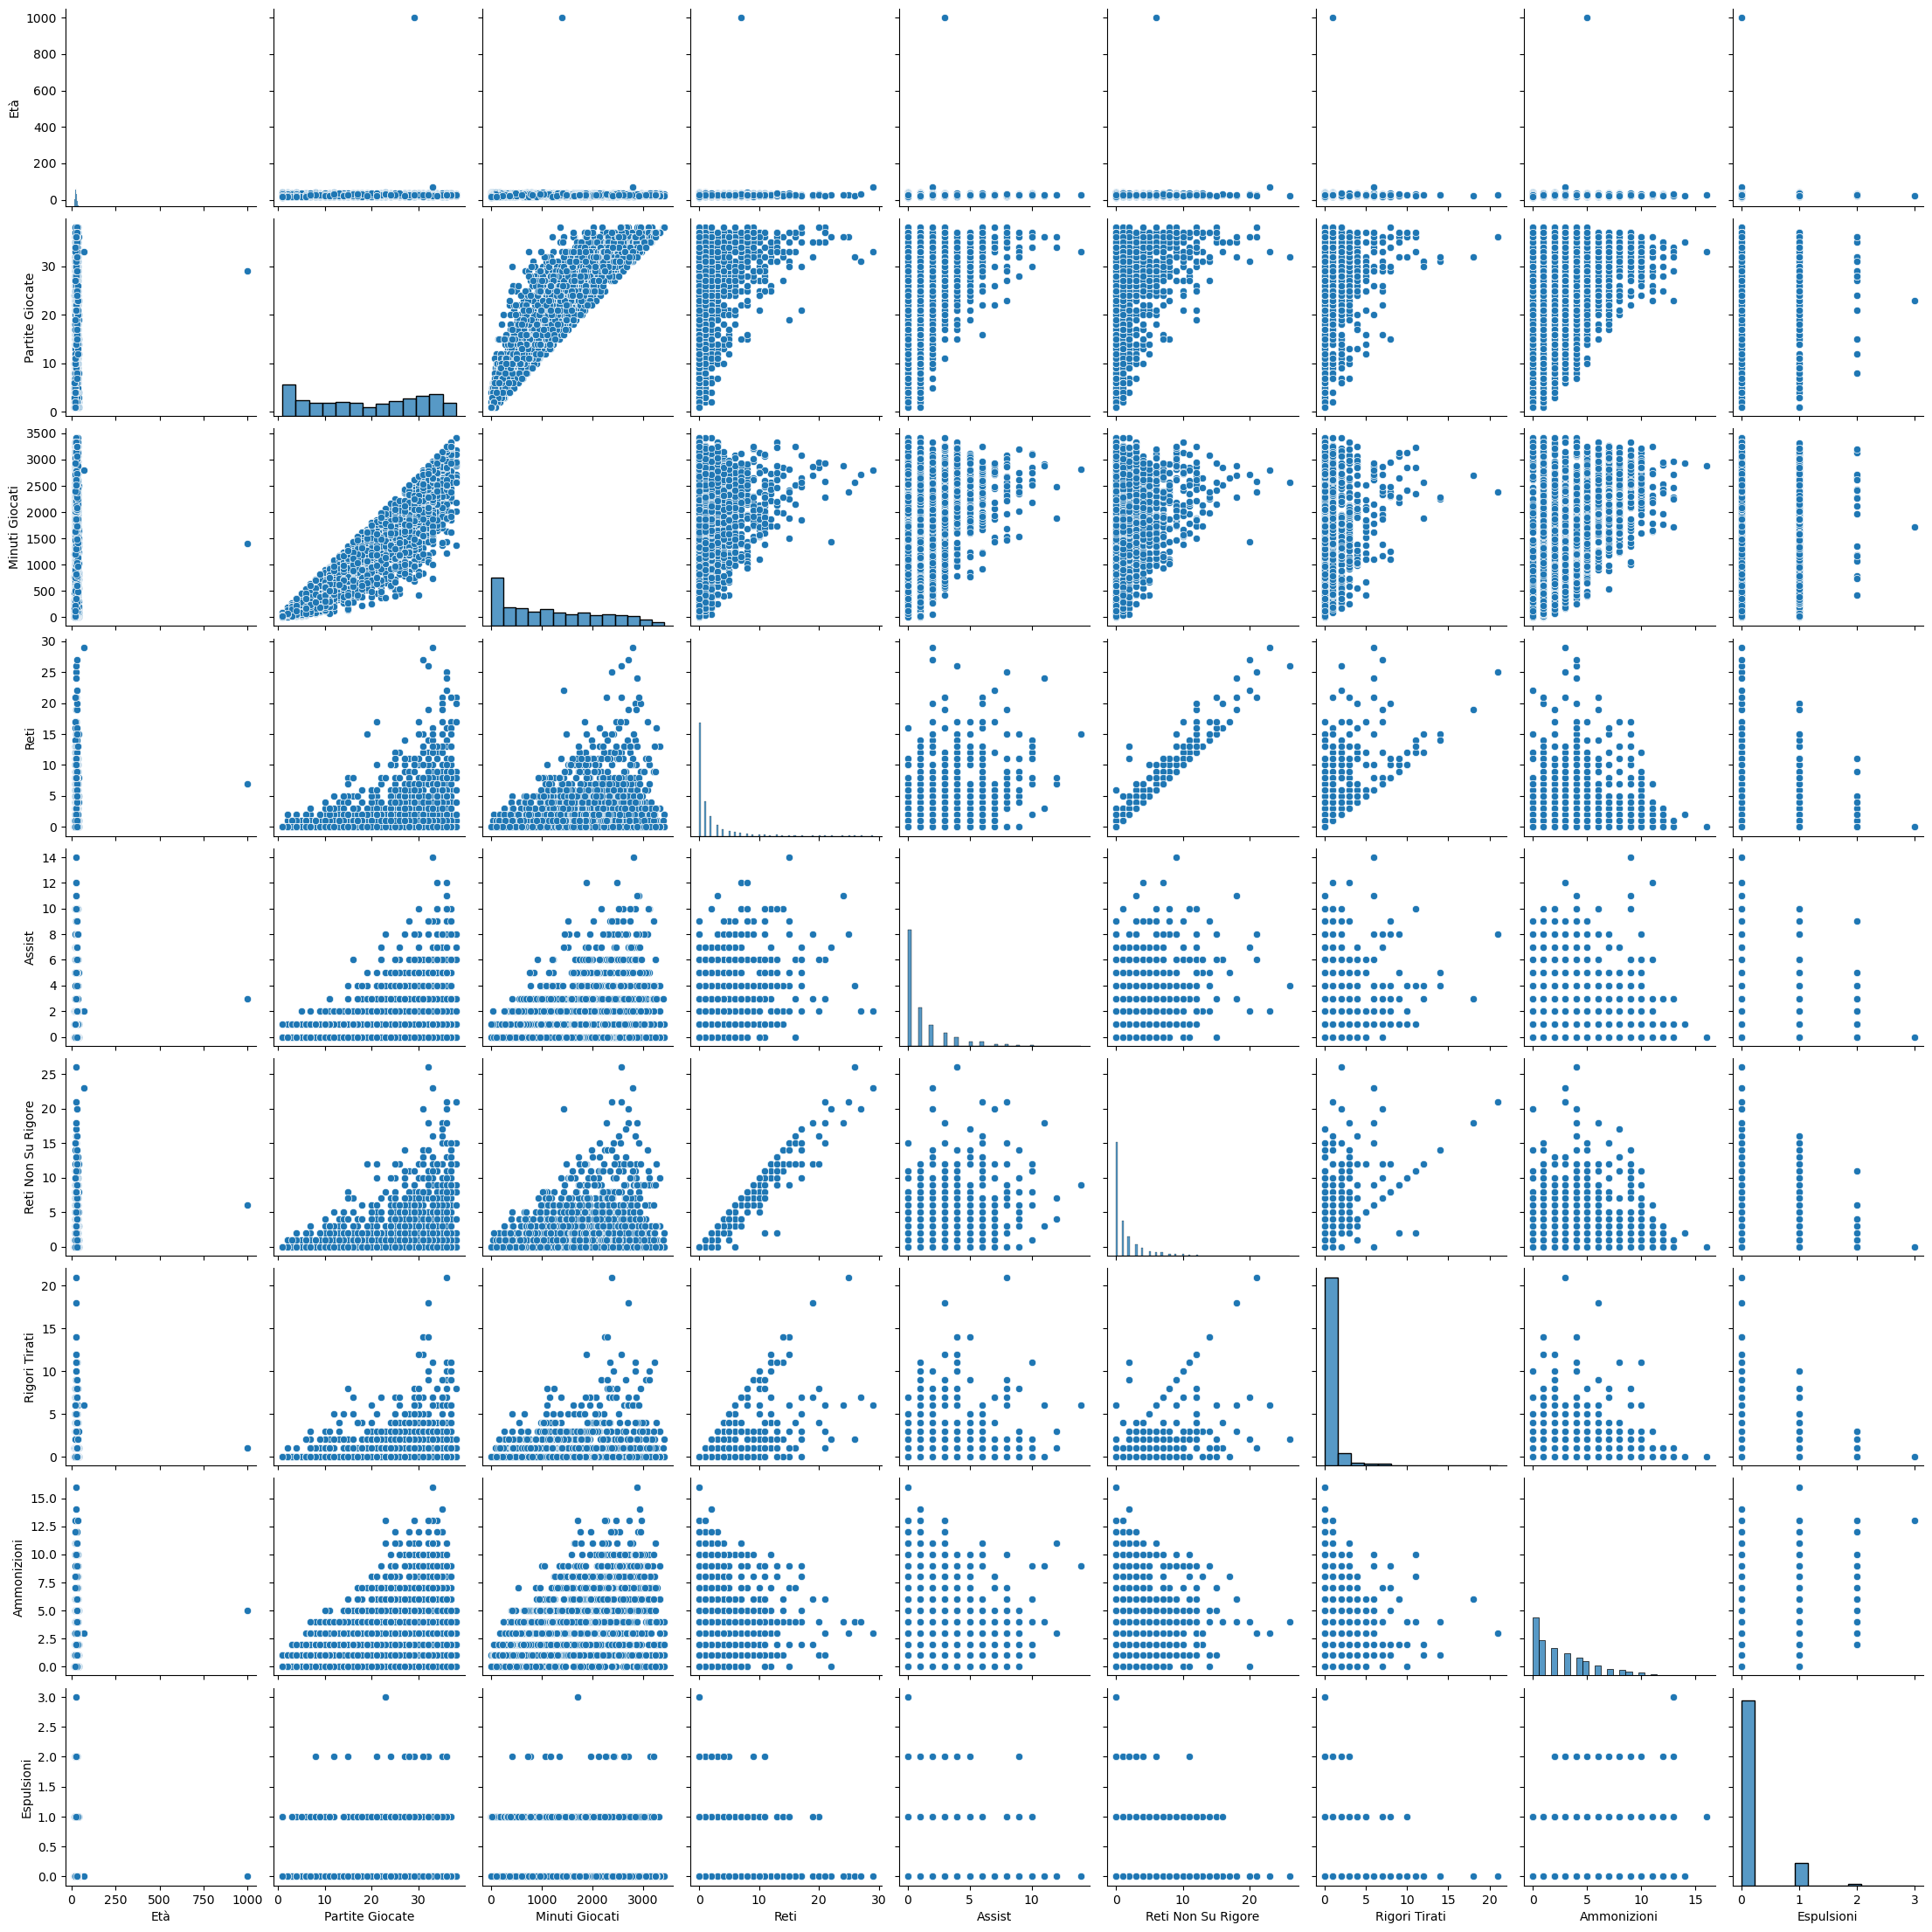

In [18]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df_num = df.select_dtypes(include='number').astype(float).dropna()
sns.pairplot(df_num.select_dtypes(include='number'))
plt.show()

In [26]:
df.loc[df['Età']>100]

,Stagione,Calciatore,Squadra,Età,Partite Giocate,Minuti Giocati,Reti,Assist,Reti Non Su Rigore,Rigori Tirati,Ammonizioni,Espulsioni,Ruolo?
2287,2020-21,Goran Pandev,Genoa,1000,29,1404,7,3,6,1,5,0,"Att,Cen"


In [27]:
df.at[2287,'Età']=np.nan

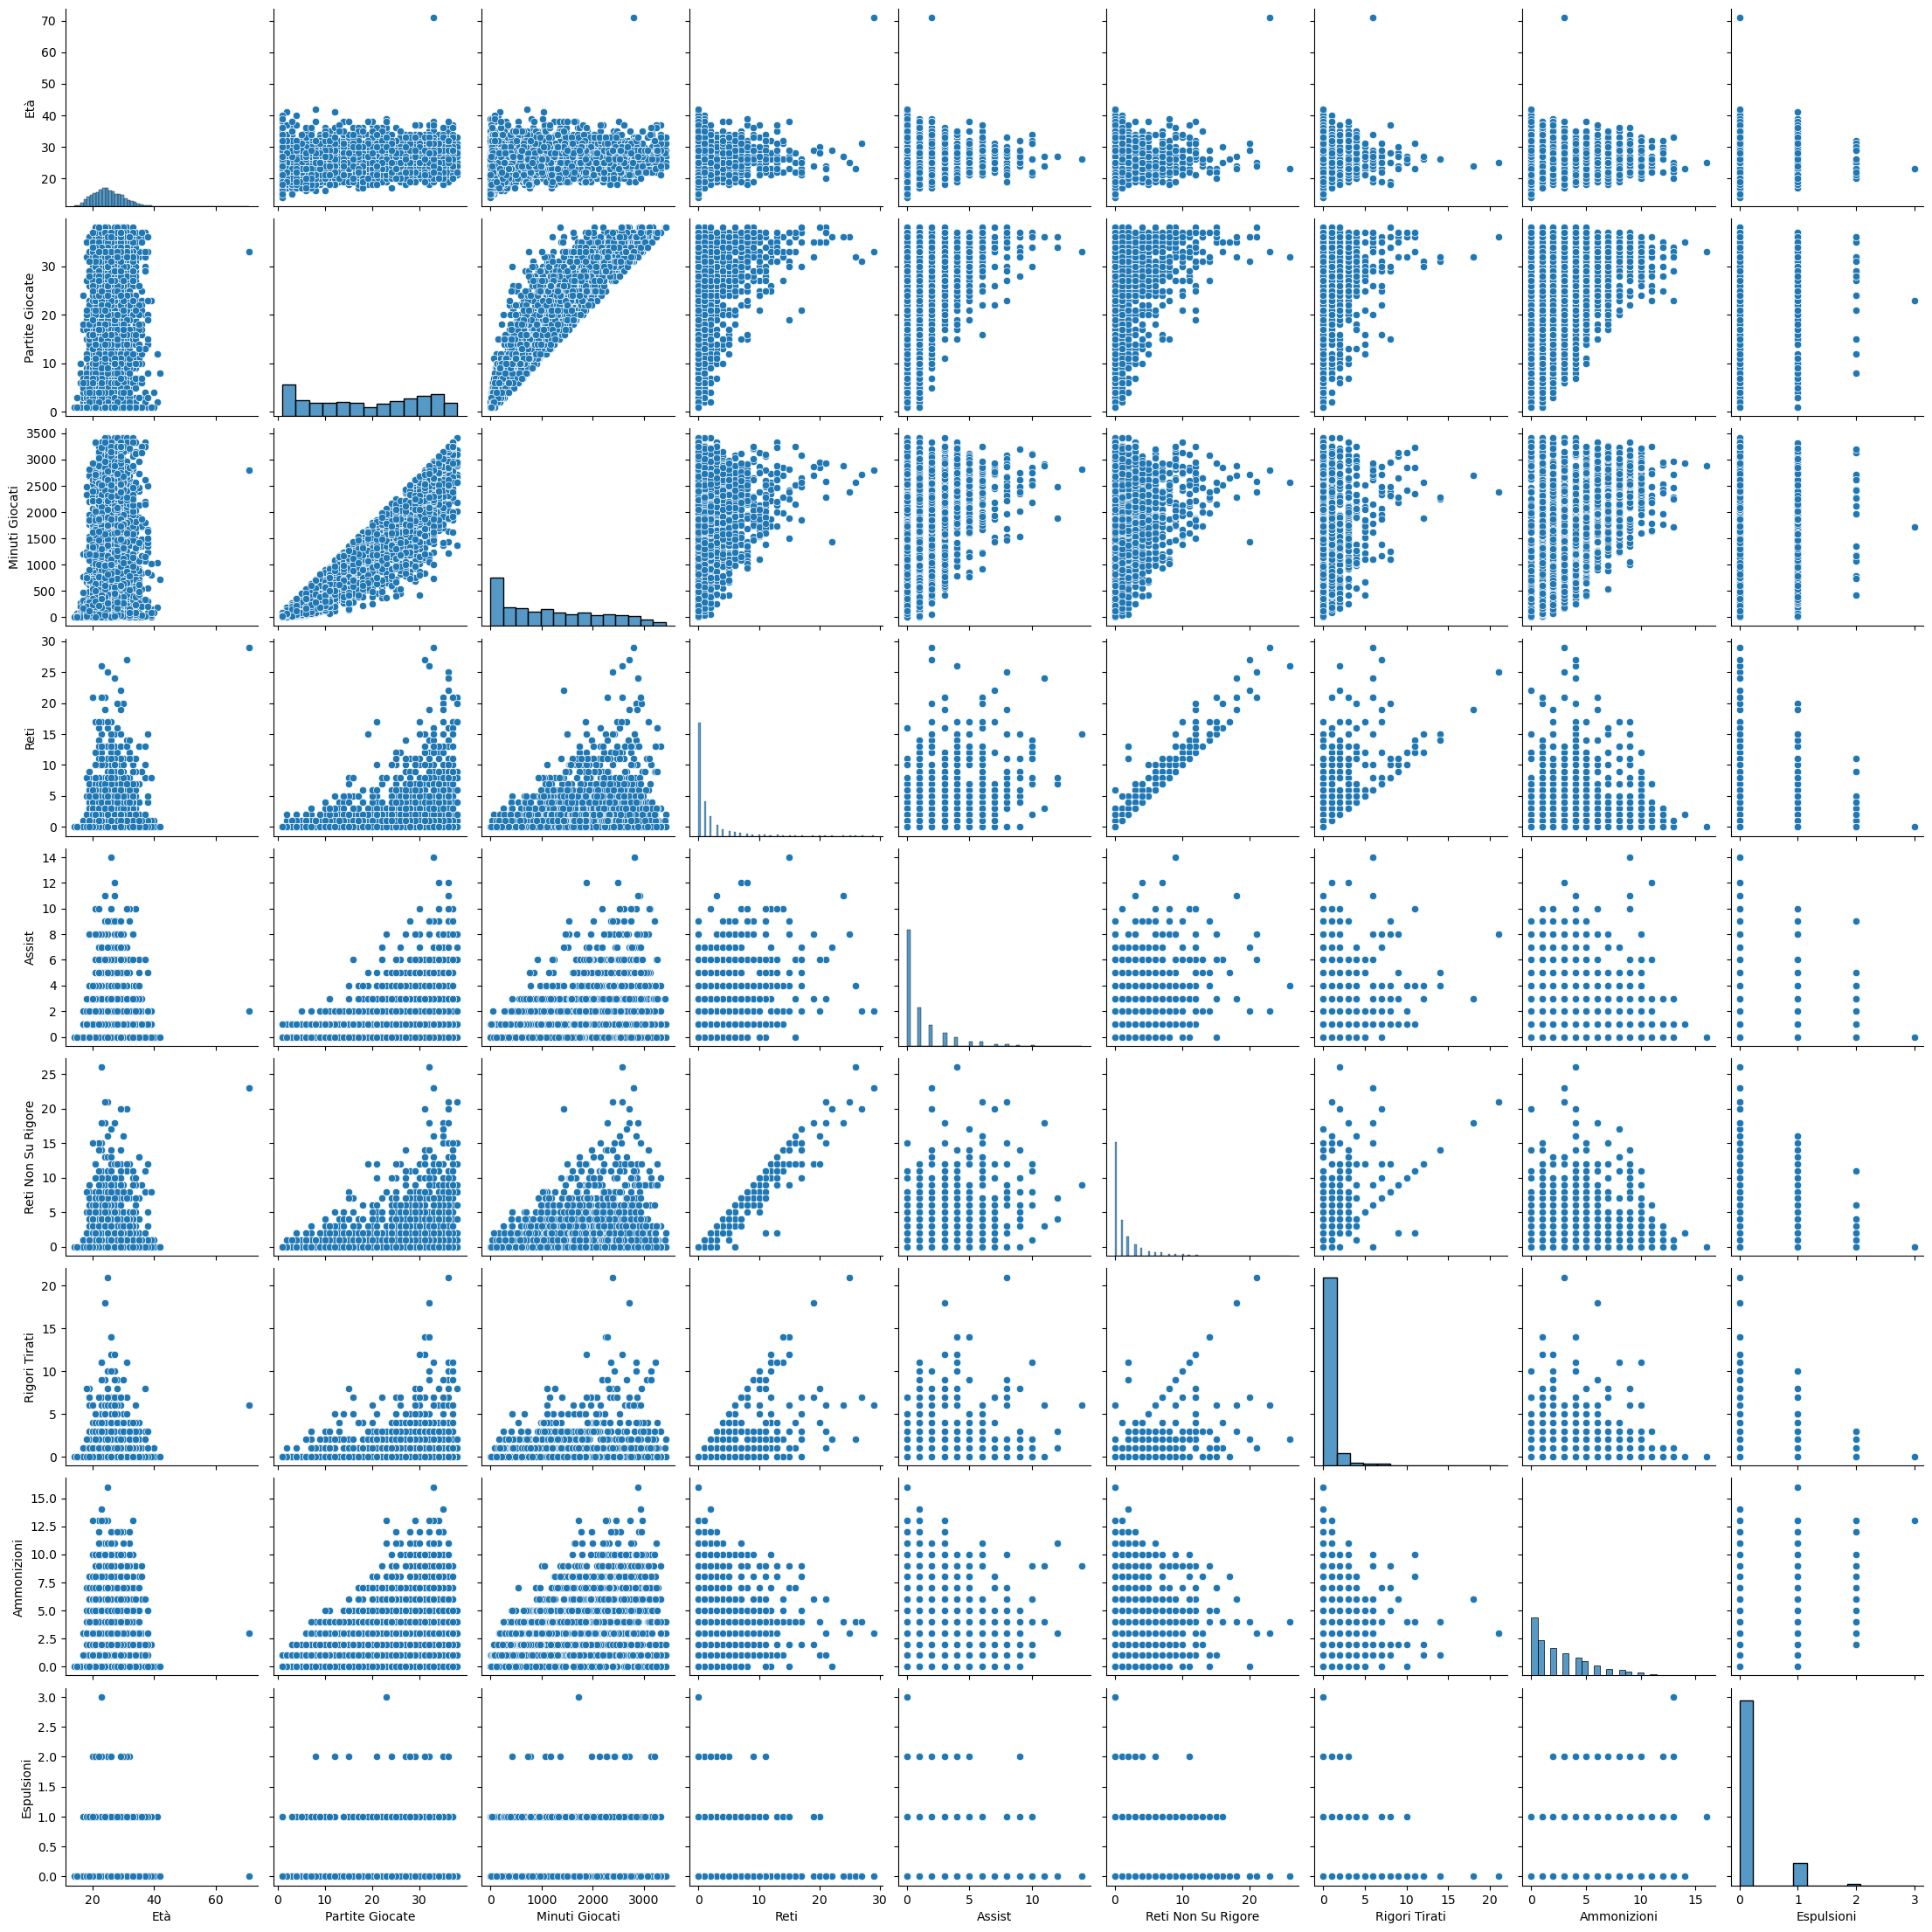

In [28]:
warnings.simplefilter(action='ignore', category=FutureWarning)
df_num = df.select_dtypes(include='number').astype(float).dropna()
sns.pairplot(df_num.select_dtypes(include='number'))
plt.show()

In [29]:
df.loc[df['Età']>50]

,Stagione,Calciatore,Squadra,Età,Partite Giocate,Minuti Giocati,Reti,Assist,Reti Non Su Rigore,Rigori Tirati,Ammonizioni,Espulsioni,Ruolo?
2363,2020-21,Cristiano Ronaldo,Juventus,71,33,2802,29,2,23,6,3,0,Att


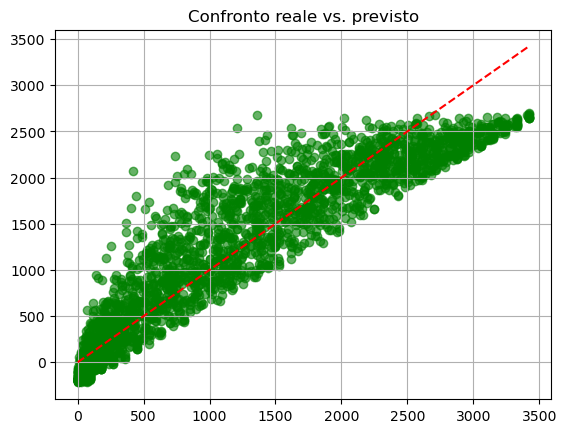

In [34]:
X = df_num[['Età', 'Partite Giocate','Reti']]  
y = df_num['Minuti Giocati']    
X_b = np.c_[np.ones(X.shape[0]), X]  # shape (6, 3)

# Calcolo dei coefficienti beta = (XᵗX)^(-1) Xᵗy
beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
y_pred = X_b @ beta  # previsioni su tutto il dataset
plt.scatter(y, y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title("Confronto reale vs. previsto")
plt.grid(True)
plt.show()

In [37]:
df.loc[df['Minuti Giocati']<0]

,Stagione,Calciatore,Squadra,Età,Partite Giocate,Minuti Giocati,Reti,Assist,Reti Non Su Rigore,Rigori Tirati,Ammonizioni,Espulsioni,Ruolo?


In [40]:
att=df.loc[df['Ruolo?']=='Att']
Natt=df.loc[df['Ruolo?']!='Att']

In [41]:
class Percettrone:
    def __init__(self, learning_rate=0.1, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X, dtype=np.int64)   # Forziamo interi
        y = np.array(y, dtype=np.int64)

        # Inizializza pesi e bias
        n_features = X.shape[1]
        self.weights = np.zeros(n_features, dtype=float)
        self.bias = 0.0

        # Addestramento
        for _ in range(self.n_epochs):
            for xi, target in zip(X, y):
                # Predizione
                y_pred = self.predict_single(xi)
                # Aggiornamento solo se errore
                update = self.learning_rate * (target - y_pred)
                self.weights += update * xi
                self.bias += update

    def predict_single(self, x):
        activation = np.dot(x, self.weights) + self.bias
        return 1 if activation >= 0 else 0

    def predict(self, X):
        X = np.array(X, dtype=np.int64)
        return np.array([self.predict_single(xi) for xi in X], dtype=np.int64)

In [55]:
df_noNA=df.dropna()

In [56]:
X = df_noNA.select_dtypes(include='number')
Y = df_noNA["Ruolo?"].map(lambda x: 1 if "Att" in x else 0)

In [57]:
X

,Età,Partite Giocate,Minuti Giocati,Reti,Assist,Reti Non Su Rigore,Rigori Tirati,Ammonizioni,Espulsioni
0,20,6,88,0,0,0,0,1,0
1,25,4,205,0,1,0,0,0,0
2,28,1,7,0,0,0,0,0,0
3,26,1,1,0,0,0,0,0,0
4,26,28,1183,3,4,2,2,1,0
...,...,...,...,...,...,...,...,...,...
2483,29,24,1740,1,0,1,0,6,0
2484,26,36,2523,8,10,8,0,2,0
2485,19,4,113,0,0,0,0,0,0
2486,29,7,603,0,0,0,0,1,0


In [58]:
Y

0       0
1       0
2       0
3       1
4       1
       ..
2483    0
2484    0
2485    1
2486    0
2487    1
Name: Ruolo?, Length: 2481, dtype: int64

In [66]:
np.sum(Y==1)/Y.size

0.3127771060056429

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,        # 20% per il test
    random_state=42,      # per riproducibilità
    shuffle=True          # mescola i dati prima di dividere
)

In [92]:
perc = Percettrone(learning_rate=0.1, n_epochs=1500)
perc.fit(X_train, y_train)
y_pred=perc.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n\nReport:\n", classification_report(y_test, y_pred))

Accuracy: 0.778672032193159


Confusion Matrix:
 [[254  86]
 [ 24 133]]


Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82       340
           1       0.61      0.85      0.71       157

    accuracy                           0.78       497
   macro avg       0.76      0.80      0.76       497
weighted avg       0.82      0.78      0.79       497

